In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
import numpy.linalg
from tqdm.notebook import tqdm
from sklearn.metrics.pairwise import euclidean_distances
from dataclasses import dataclass
import networkx as nx

In [2]:
#df = pd.DataFrame(arff.loadarff("2d-10c.arff")[0])
#df = pd.DataFrame(arff.loadarff("3-spiral.arff")[0])
#df = pd.DataFrame(arff.loadarff("dense-disk-5000.arff")[0])
#df = pd.DataFrame(arff.loadarff("cluto-t4-8k.arff")[0])
df = pd.DataFrame(arff.loadarff("2sp2glob.arff")[0])
#df = pd.DataFrame(arff.loadarff("diamond9.arff")[0])
df["CLASS"] = df["class"]
df["CLASS"] = df["CLASS"].map({x: i for i, x in enumerate(df["CLASS"].unique())})
df

,x,y,class,CLASS
0,10.500000,9.000000,b'1',0
1,10.567170,9.268445,b'1',0
2,8.275320,11.382210,b'1',0
3,8.227458,11.377640,b'1',0
4,8.179511,11.372110,b'1',0
...,...,...,...,...
1995,35.081000,30.135357,b'4',3
1996,35.186100,29.350480,b'4',3
1997,35.204200,29.514780,b'4',3
1998,35.921200,27.968540,b'4',3


In [3]:
#X = df[["a0", "a1"]].to_numpy()
X = df[["x", "y"]].to_numpy()

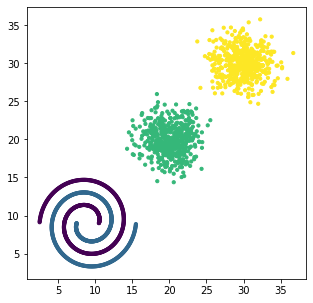

In [4]:
plt.figure(figsize=(5, 5))
#plt.scatter(df["a0"], df["a1"], c=df["CLASS"], s=[10] * len(X))
plt.scatter(df["x"], df["y"], c=df["CLASS"], s=[10] * len(X))

In [5]:
k = int(np.log(len(X)))
#k = int(np.sqrt(len(X)))
k

7

In [6]:
class KNearestNeighborGraph:
    def __init__(self):
        self.graph = None

    def build(self, X, k):
        self.graph = nx.Graph()

        for i in range(len(X)):
            self.graph.add_node(i)

        distance_matrix = euclidean_distances(X, X)

        for a in tqdm(range(len(X))):
            for b in np.argsort(distance_matrix[a])[1:k + 1]:
                self.graph.add_edge(a, b, weight=1 / distance_matrix[a][b])

        return self

knng = KNearestNeighborGraph().build(X, k=k)

  0%|          | 0/2000 [00:00<?, ?it/s]

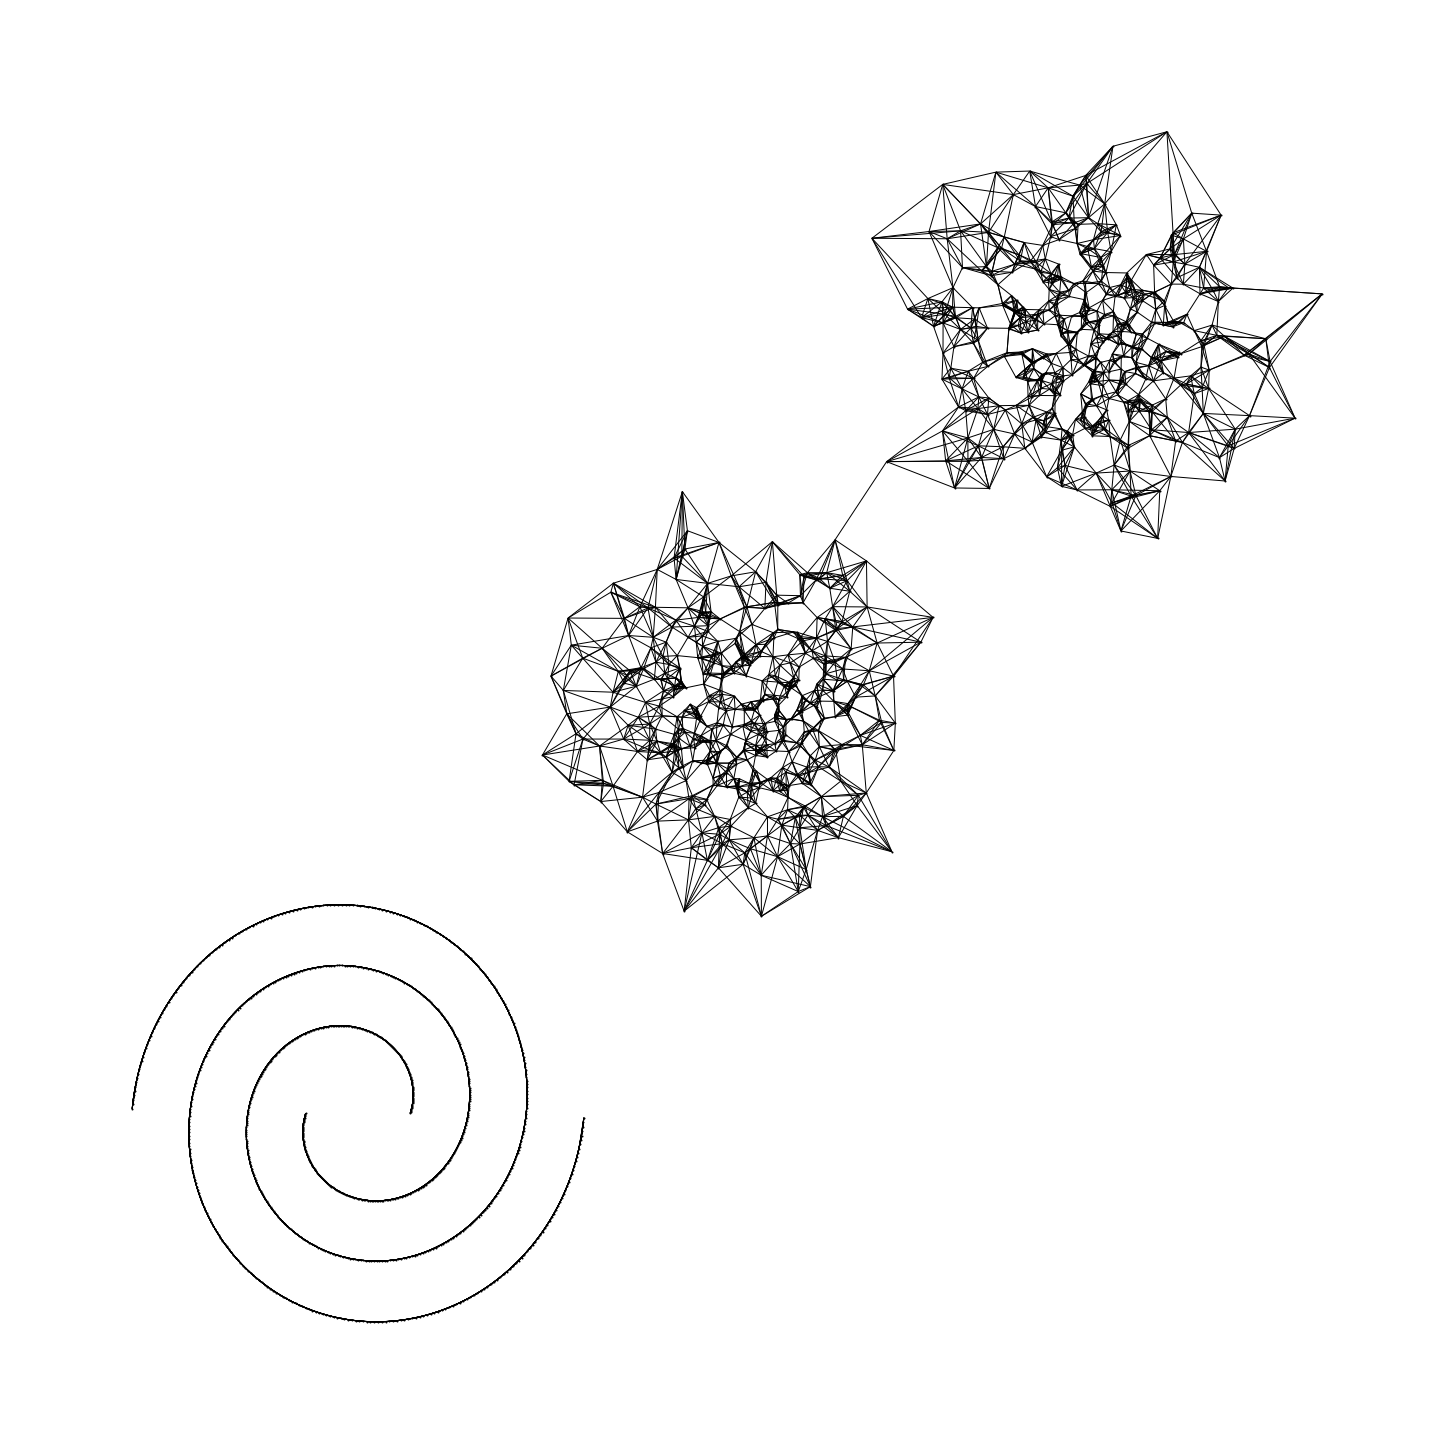

In [7]:
plt.figure(figsize=(20, 20))
nx.draw(knng.graph, pos=X, node_size=1, node_color="black")
plt.savefig("1.png", dpi=200)

In [8]:
len(X)

2000

In [9]:
N_remove = len(knng.graph.edges()) // 2
N_remove

4116

In [10]:
i = 0
for a, b, w in sorted(knng.graph.edges(data=True), key=lambda x: x[2].get("weight", 1)):
    if i >= N_remove:
        break

    if knng.graph.has_edge(a, b):
        if knng.graph.degree(a) > 1:
            knng.graph.remove_edge(a, b)
            i += 1

    if knng.graph.has_edge(b, a):
        if knng.graph.degree(b) > 1:
            knng.graph.remove_edge(b, a)
            i += 1
i

4116

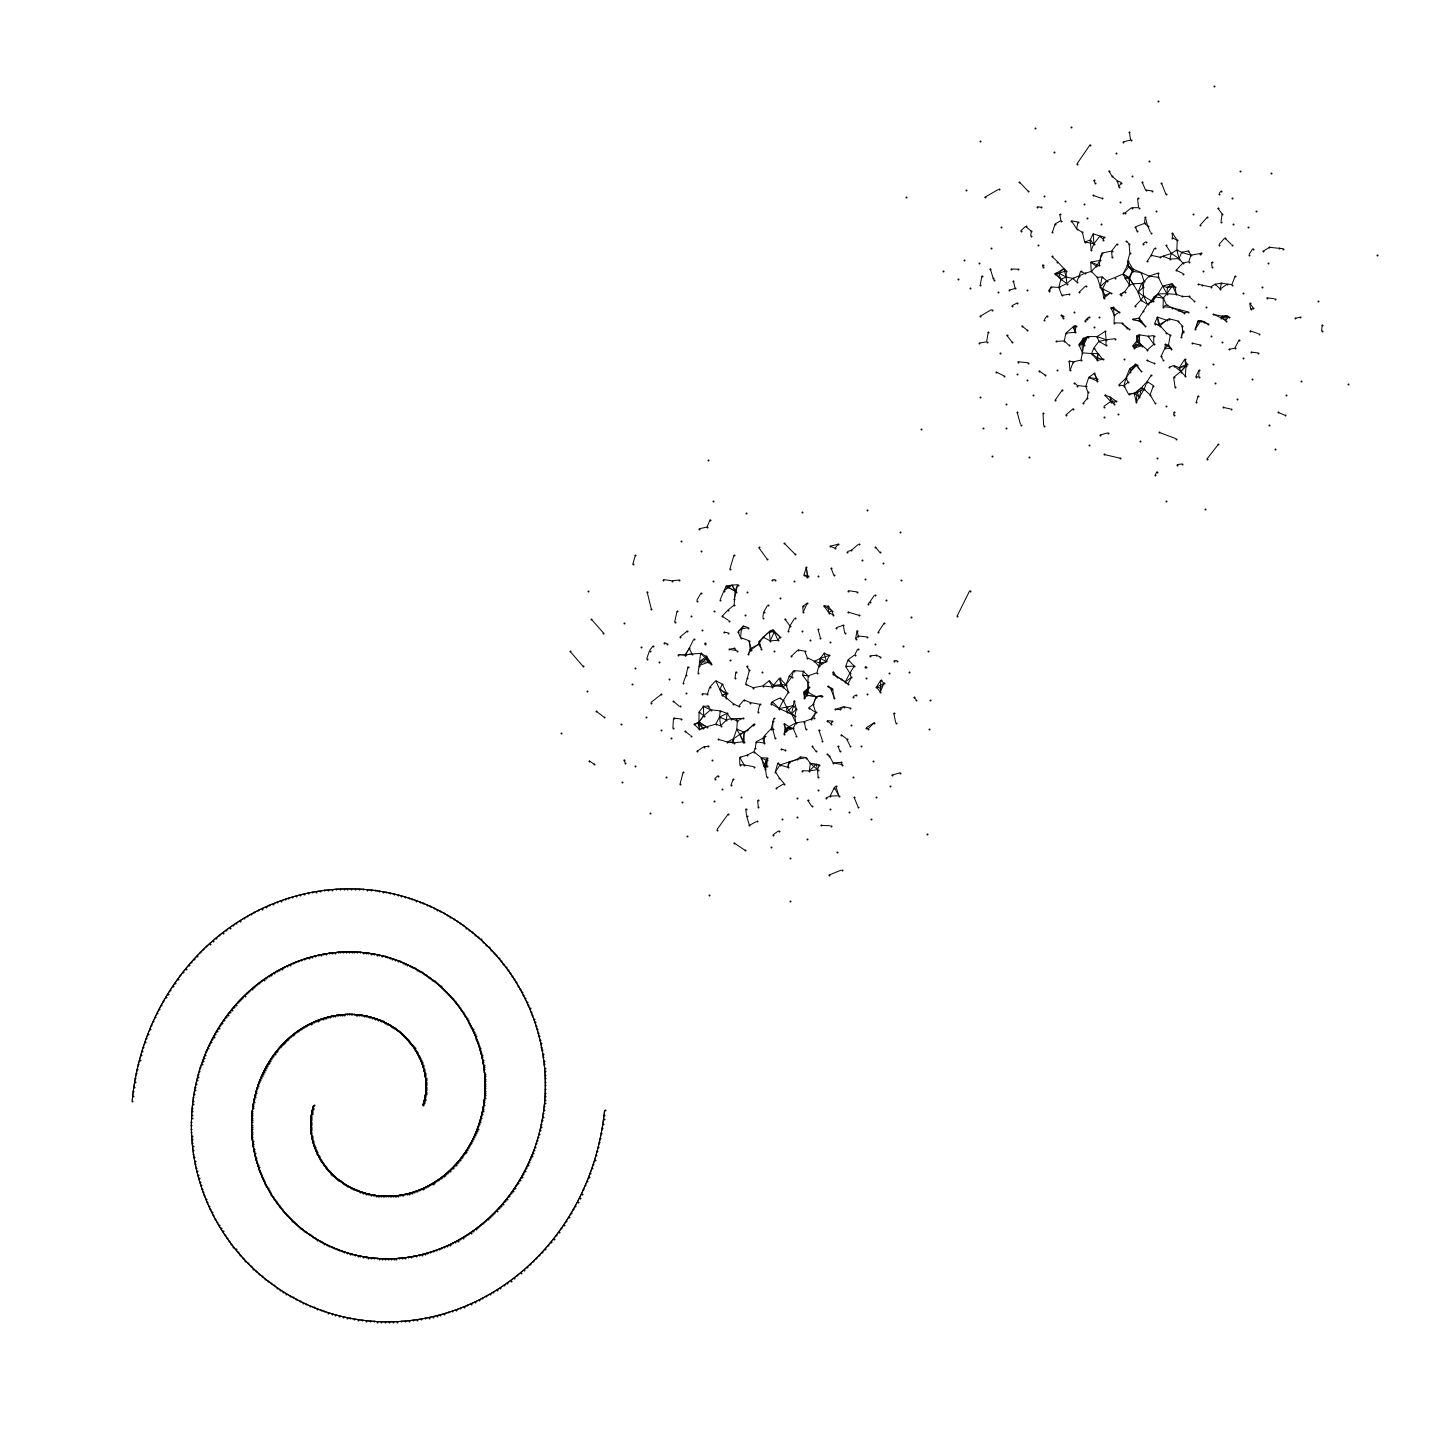

In [11]:
plt.figure(figsize=(20, 20))
nx.draw(knng.graph, pos=X, node_size=1, node_color="black")
plt.savefig("2.png", dpi=200)

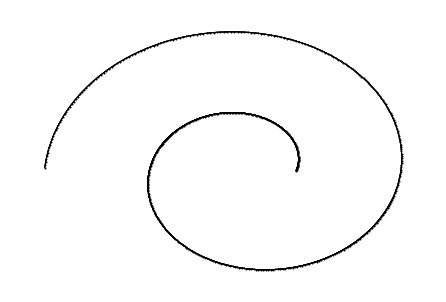

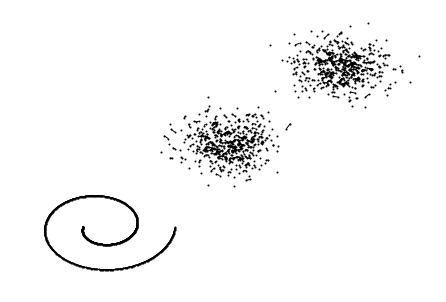

In [12]:
for x in sorted(list(nx.connected_components(knng.graph)), key=lambda t: len(t), reverse=True)[:10]:
    nx.draw(knng.graph.subgraph(x), pos=X, node_size=1, node_color="black")
    plt.show()
    t = knng.graph.copy()
    t.remove_nodes_from(x)
    nx.draw(t, pos=X, node_size=1, node_color="black")
    plt.show()
    break

In [13]:
xd = nx.Graph()

for i in list(t.nodes()):
    xd.add_node(i)

distance_matrix = euclidean_distances(X, X)

for a in tqdm(t.nodes()):
    for b in np.argsort(distance_matrix[a])[1:k + 1]:
        xd.add_edge(a, b, weight=1 / distance_matrix[a][b])

  0%|          | 0/1500 [00:00<?, ?it/s]

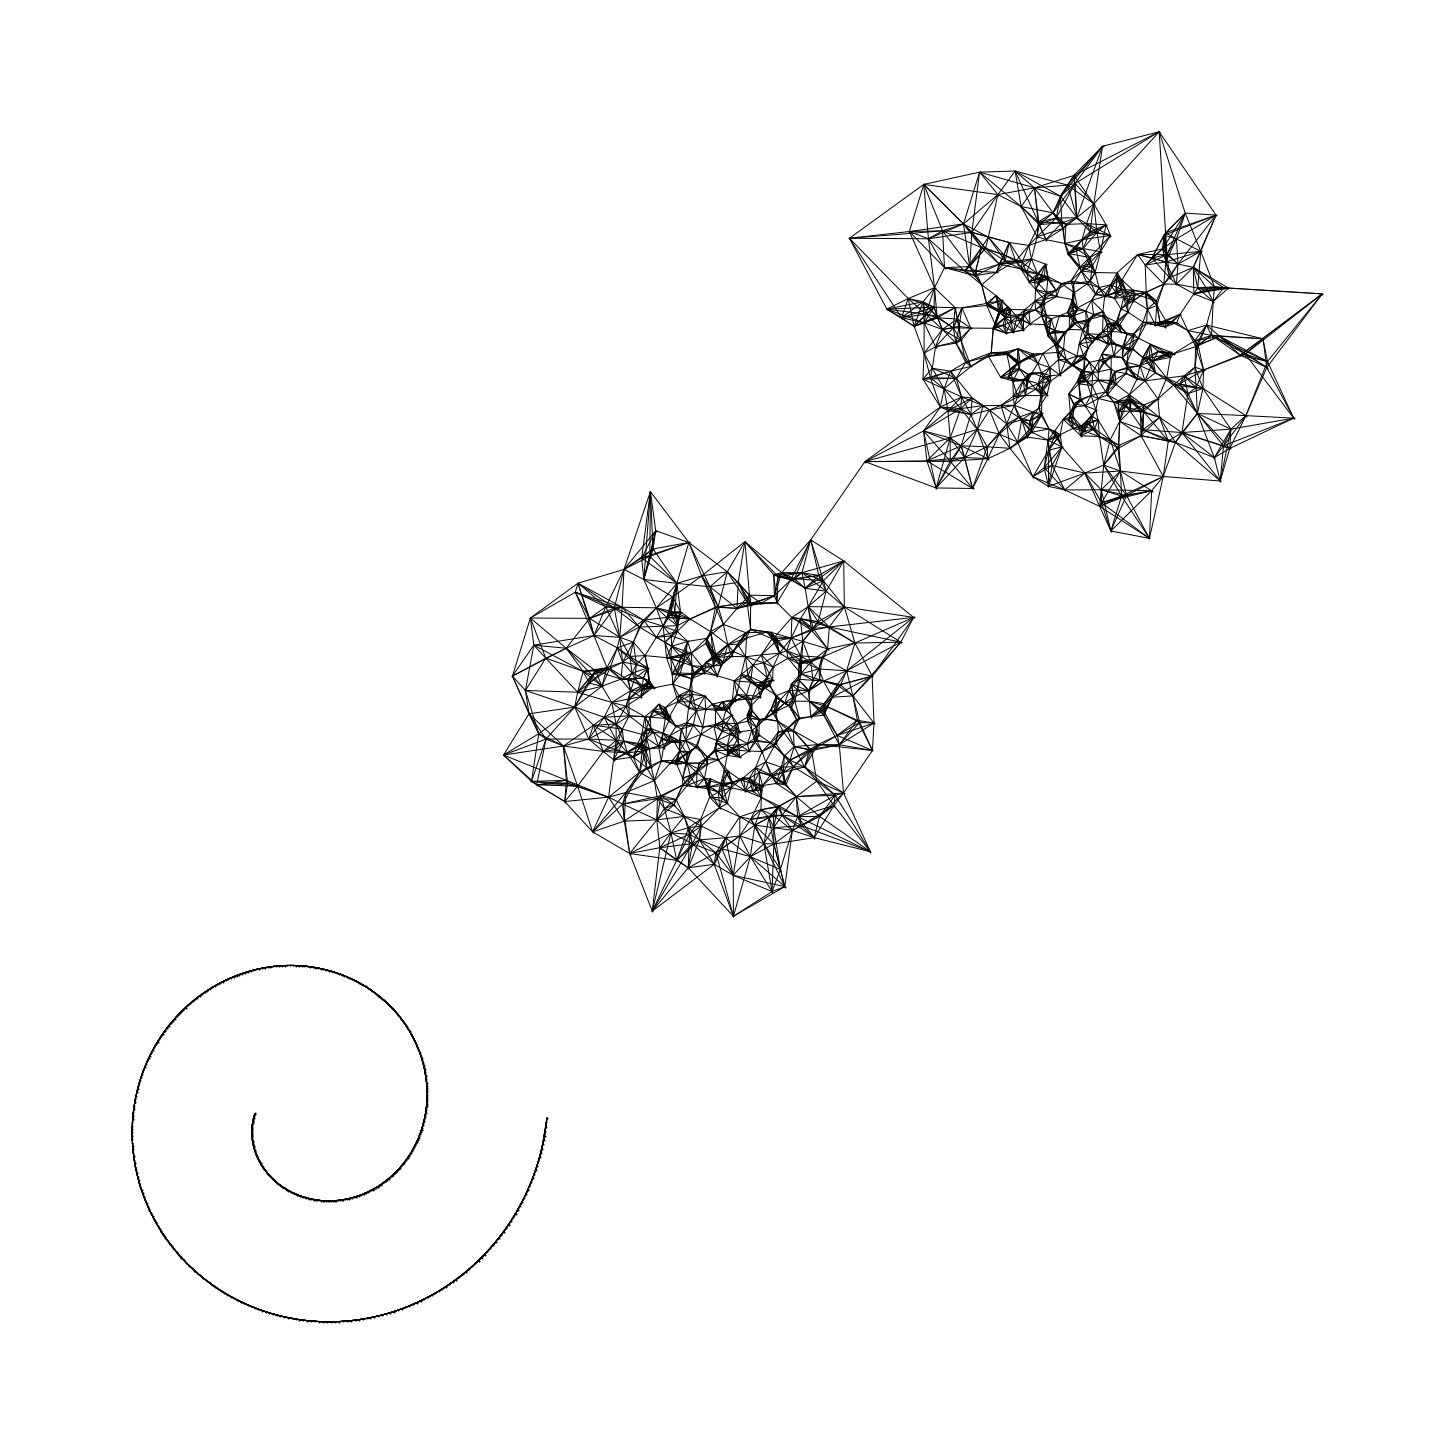

In [14]:
plt.figure(figsize=(20, 20))
nx.draw(xd, pos=X, node_size=1, node_color="black")
plt.savefig("3.png", dpi=200)

In [15]:
i = 0
for a, b, w in sorted(xd.edges(data=True), key=lambda x: x[2].get("weight", 1)):
    if i >= len(xd.edges()) // 2:
        break

    if xd.has_edge(a, b):
        if xd.degree(a) > 1:
            xd.remove_edge(a, b)
            i += 1

    if xd.has_edge(b, a):
        if xd.degree(b) > 1:
            xd.remove_edge(b, a)
            i += 1
i

2077

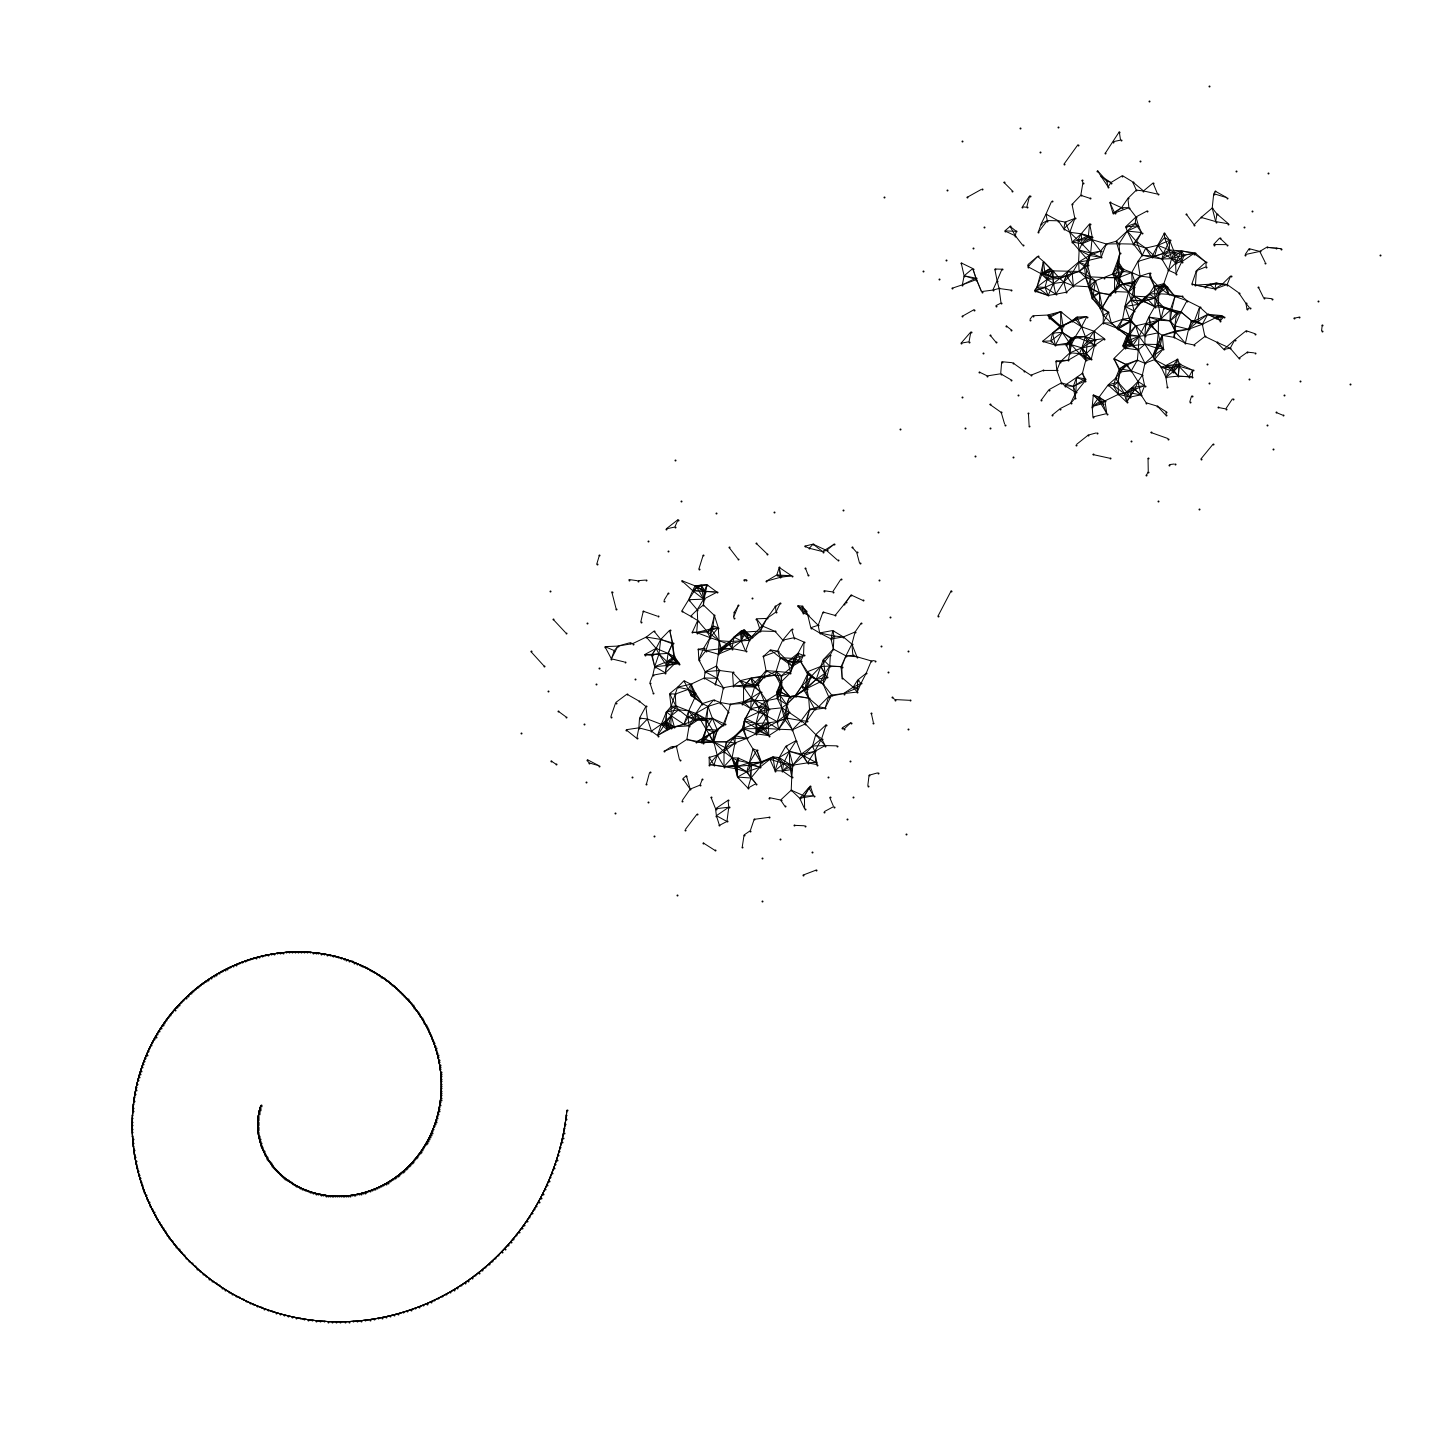

In [16]:
plt.figure(figsize=(20, 20))
nx.draw(xd, pos=X, node_size=1, node_color="black")